# <center>Muon-Decay Monte Carlo Simulations</center>

### Let's plot 2 exponential pulses of amplitudes A1, A2,  occuring at times T_start, T2, respectively, in a time window between the first and the second pulse given by T_max. We assume that both pulses have the same decay time Tau_pulse. All times expressed in ns.


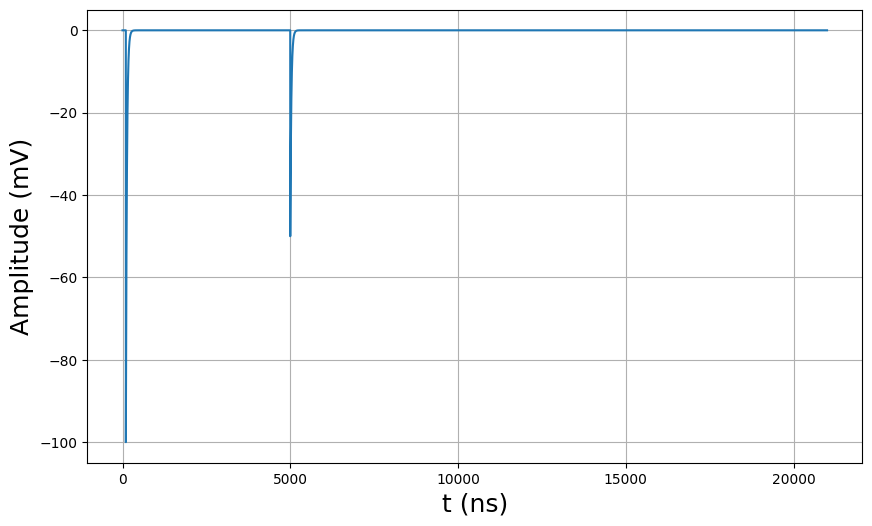

In [42]:
import numpy as np
import matplotlib.pyplot as plt

A1 = 100 # mV
A2 = 50 # mV
T_start = 100 # ns  by convention first pulse occurs at time T_start
T2 = 5000 # ns
T_max = 20000  # ns
Tau_pulse = 30 # ns


Y = []

for t in range(T_max + T1):
  if (t < T_start): y1 = 0
  else: y1 = -A1*np.exp(-(t-T_start)/Tau_pulse)
  if (t < T2): y2 = 0
  else: y2 = -A2*np.exp(-(t-T2)/Tau_pulse)
  Y.append(y1+y2)
X = [i for i in range(len(Y))]
fig=plt.figure(figsize=(10,6), dpi= 100)
plt.plot(X,Y)
plt.xlabel('t (ns)', fontsize=18)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.grid()
plt.show()

### Let´s use Plotly instead of Matplotlib

In [43]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=Y,mode='lines+markers',
    line=dict(color="blue",  width=2),
    marker=dict(color="green", size=4)))
fig.update_layout(
    title="Simulation of a Double-Pulse Event",
    xaxis_title="Time (ns)",
    yaxis_title="Amplitude (mV)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"))
fig.show(renderer="colab")



---



### Now we assume that T2 is distributed ramdomly according to an exponential distribution whose probability density function (PDF) is given by

$$ P(t) = \frac{exp(-t/\tau)}{\tau} $$

### where P(t)dt is the probability that T2 occurs between t and t+dt

### Note that

$$\int_{0}^{\infty}P(t)dt = 1 $$ 


In [44]:
Tau = 2100 # ns
t = np.linspace(0,10*Tau,1000)

def P(t):
    Y = np.exp(-t/Tau) 
    return Y
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=P(t),mode='lines+markers',
    line=dict(color="green",  width=2),
    marker=dict(color="blue", size=4)))
fig.update_layout(
    title="PDF for an Exponential Distribution",
    xaxis_title="t (ns)",
    yaxis_title="P(t)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"))
fig.show(renderer="colab")

###. To generate the exponential distribution we can generate pairs of points uniformly distributed on a rectangle of height 1 and base T and keep only the points that lie below the exponential curve.

In [45]:
Tau = 2100 # ns
N = 1000
T_max = 20000 # ns
t = np.linspace(0,T_max,1000)

def P(t):
    Y = np.exp(-t/Tau) 
    return Y
t2 = np.random.uniform(0,T_max,N)
Y2 = np.random.uniform(0,1,N)
P2 = P(t2)
marker_color = ["green" if Y2[i]<P2[i] else "red" for i in range(len(t2))]
marker_type = ["circle" if Y2[i]<P2[i] else "x" for i in range(len(t2))]

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=P(t),mode='lines+markers',
    line=dict(color="green",  width=2),
    marker=dict(color="blue", size=4)))
fig.add_trace(go.Scatter(x=t2, y=Y2,mode='markers',
    marker=dict(color=marker_color, size=8, symbol = marker_type)))
fig.update_layout(
    title="Simulation of a Double-Pulse Event",
    xaxis_title="t (ns)",
    yaxis_title="P(t)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"))
fig.show(renderer="colab")

### By the way, this is the basis of MC integration, i.e., just counting the fraction of green points.


### Now let´s assume that A1 and A2 are distributed normally with a mean values A1_mean, A2_mean  and sigmas A1_sigma, A2_sigma, respectively.

In [46]:
N = 50000
A1_mean = 80 # mV
A1_sigma = 20 # mV
A = np.random.normal(A1_mean,A1_sigma,N)
import plotly.express as px
fig = px.scatter( x=[i for i in range(len(A))], y=A, marginal_y="histogram")
fig.show(renderer="colab")


Output hidden; open in https://colab.research.google.com to view.

Let´s generate N events with an added flat background, i.e., uniform distribution for the time difference between the first and the second pulse, with amplitude distribution A_Backg_mean, A_Backg_sigma and an occurence probability of P_Backg.

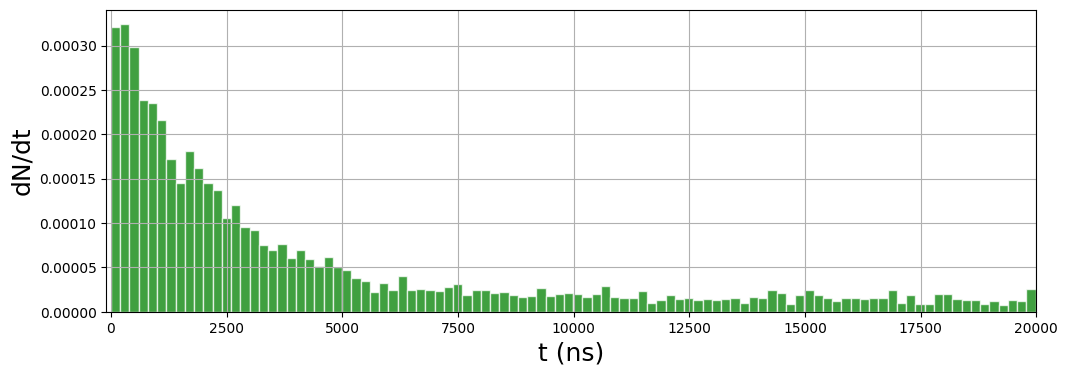

Total Number of Signal Events =  3499 Total Number of Background Events =  1500


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
T_max =  20000 # ns
N = 5000
P_Backg = .3
N_Signal = round(N*(1-P_Backg))

Tau = 2100
Tau_pulse = 30
A1_mean = 80 # mV
A1_sigma = 20 # mV
A2_mean = 50 # mV
A2_sigma = 20 # mV
A_Backg_mean = 60 # mv
A_Backg_sigma = 20 # mv

T_mu = np.random.exponential(scale=Tau, size=N_Signal)
T_mu = T_mu[T_mu<T_max]
N_Signal = len(T_mu)
N_Backg = round(N_Signal*P_Backg/(1-P_Backg))
T_Backg = np.random.uniform(0,T_max,N_Backg)

A1_mu = np.random.normal(A1_mean,A1_sigma,N_Signal)
A2_mu = np.random.normal(A2_mean,A2_sigma,N_Signal)
A1_Backg = np.random.normal(A_Backg_mean,A_Backg_sigma,N_Backg)
A2_Backg = np.random.normal(A_Backg_mean,A_Backg_sigma,N_Backg)
T = np.concatenate([T_mu, T_Backg])
A1 = np.concatenate([A1_mu, A1_Backg])
A2 = np.concatenate([A2_mu, A2_Backg])
randomize = np.arange(len(T))
np.random.shuffle(randomize)
T = T[randomize]
A1 = A1[randomize]
A2 = A2[randomize] # the 3 arrays are now randomly shuffled in the same way

fig=plt.figure(figsize=(12,4), dpi= 100)

n, bins, patches = plt.hist(T, 100, density=True, facecolor='g', alpha=0.75,edgecolor='white')

plt.xlim((-100,T_max)) 
plt.xlabel('t (ns)', fontsize=18)
plt.ylabel('dN/dt', fontsize=18)
plt.grid()
plt.show()
print ("Total Number of Signal Events = ", len(T_mu), "Total Number of Background Events = ", N_Backg)

We can select one event randomly

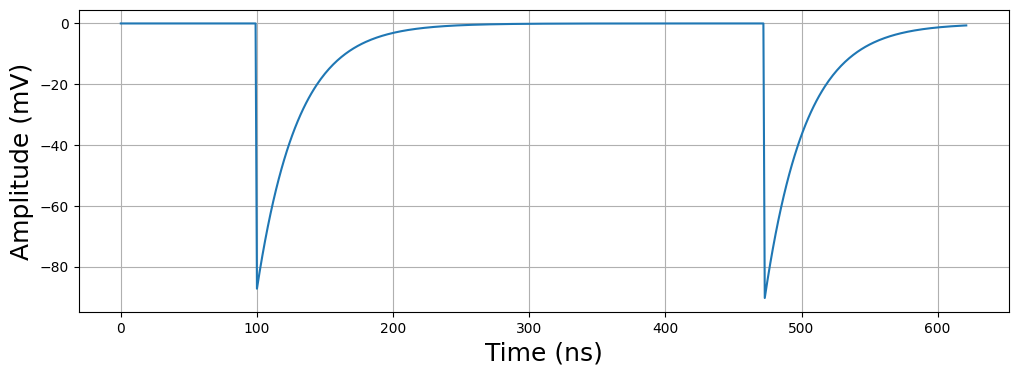

In [50]:
i = round(np.random.random()*len(T))
Tau_pulse = 30 # ns
T_start = 100 # ns

Y = []
for t in range(int(T_start+T[i]+5*Tau_pulse)):
  if (t < T_start): y1 = 0
  else: y1 = -A1[i]*np.exp(-(t-T_start)/Tau_pulse) # by convention first pulse occurs at time T_start
  if (t < T_start+T[i]): y2 = 0
  else: y2 = -A2[i]*np.exp(-(t-(T_start+T[i]))/Tau_pulse)
  Y.append(y1+y2)
X = [i for i in range(len(Y))]
fig=plt.figure(figsize=(12,4), dpi= 100)
plt.plot(X,Y)
plt.xlabel('t (ns)', fontsize=18)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.xlabel('Time (ns)', fontsize=18)
plt.grid()
plt.show()

### Next we show an animation with several events

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
def Grafica(i):
  ax[0].clear() 
  ax[1].clear()
  Y = []
  for t in range(int(T1+T[i]+5*Tau_pulse)):
    if (t < T1): y1 = 0
    else: y1 = -A1[i]*np.exp(-(t-T1)/Tau_pulse)
    if (t < T1+T[i]): y2 = 0
    else: y2 = -A2[i]*np.exp(-(t-(T1+T[i]))/Tau_pulse)
    Y.append(y1+y2)
  X = [i for i in range(len(Y))]
  ax[0].plot(X, Y)
  ax[0].set_xlim((0,T_max+5*Tau_pulse)) 
  ax[0].set_ylim((-150,10)) 
  ax[0].set_xlabel('t (ns)', fontsize=18)
  ax[0].set_ylabel('Amplitude (mV)', fontsize=18)
  ax[0].grid()
  ax[1].hist(T[0:i]-1000,100)
  ax[1].set_xlim((-100,20000)) 
  ax[1].set_ylim((-1,10)) 
  ax[1].set_xlabel('t (ns)', fontsize=18)
  ax[1].set_ylabel('dN/dt', fontsize=18)
fig=plt.figure(figsize=(10,6), dpi= 100)
ax= fig.subplots(2,1)
anim = animation.FuncAnimation(fig, Grafica, frames=100 , interval=500)
plt.close()
HTML(anim.to_html5_video())

### Now we use a time granularity of 8 ns assuming we digitize the signal with an ADC running at 125 MHz

In [52]:
import plotly.graph_objects as go
i = round(np.random.random()*len(T))

T_start = 100 # ns

Y = []
for t in range(0,int(T1+T[i]+5*Tau_pulse),8):
  if (t < T_start): y1 = 0
  else: y1 = -A1[i]*np.exp(-(t-T_start)/Tau_pulse) # by convention first pulse occurs at time T_start
  if (t < T_start+T[i]): y2 = 0
  else: y2 = -A2[i]*np.exp(-(t-(T_start+T[i]))/Tau_pulse)
  Y.append(y1+y2)
X = [8*i for i in range(len(Y))]


fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=Y,mode='lines+markers',
    line=dict(color="green",  width=2),
    marker=dict(color="blue", size=4)))
fig.update_layout(
    title="Simulation of a Double-Pulse Event",
    xaxis_title="Time (ns)",
    yaxis_title="Amplitude (mV)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"))
fig.show(renderer="colab")

### Next we print the traces of a subset of N_s of the generated events, where each line contains the trace of one event with a granularity of 8 ns.

In [40]:
N_s = 2
T_start = 100 # ns
for i in range(N_s):
  Y = []
  for t in range(0,int(T_start+T[i]+5*Tau_pulse),8):
    if (t < T_start): y1 = 0
    else: y1 = -A1[i]*np.exp(-(t-T_start)/Tau_pulse) # by convention first pulse occurs at time T1
    if (t < T_start+T[i]): y2 = 0
    else: y2 = -A2[i]*np.exp(-(t-(T_start+T[i]))/Tau_pulse)
    Y.append(y1+y2)
    print (np.round(y1+y2,1), end =",")
  print()


0,0,0,0,0,0,0,0,0,0,0,0,0,-68.7,-52.6,-40.3,-30.8,-23.6,-18.1,-13.9,-10.6,-8.1,-6.2,-4.8,-3.7,-2.8,-2.1,-1.6,-1.3,-1.0,-0.7,-0.6,-0.4,-0.3,-0.3,-0.2,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-

### Now we print a large number of events to a file so that the events can be used to measure the parameters Tau and Tau_pulse and the distributions for A1, A2 and A_Backg.

### To access the data file we mount the entire Google Drive to Colab.

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
import numpy as np
########################## Input parameters ##############
N = 500
T_max =  20000 # ns
P_Backg = .3
N_Signal = round(N*(1-P_Backg))
Tau = 2100 # ns
Tau_pulse = 30 # ns
A1_mean = 80 # mV
A1_sigma = 20 # mV
A2_mean = 50 # mV
A2_sigma = 20 # mV
A_Backg_mean = 60 # mv
A_Backg_sigma = 20 # mv
T_start = 100 # ns
########################## Input parameters ##############

T_mu = np.random.exponential(scale=Tau, size=N_Signal)
T_mu = T_mu[T_mu<T_max]
N_Signal = len(T_mu)
N_Backg = round(N_Signal*P_Backg/(1-P_Backg))
N_s = N_Signal + N_Backg
T_Backg = np.random.uniform(0,T_max,N_Backg)

A1_mu = np.random.normal(A1_mean,A1_sigma,N_Signal)
A2_mu = np.random.normal(A2_mean,A2_sigma,N_Signal)
A1_Backg = np.random.normal(A_Backg_mean,A_Backg_sigma,N_Backg)
A2_Backg = np.random.normal(A_Backg_mean,A_Backg_sigma,N_Backg)
T = np.concatenate([T_mu, T_Backg])
A1 = np.concatenate([A1_mu, A1_Backg])
A2 = np.concatenate([A2_mu, A2_Backg])
randomize = np.arange(len(T))
np.random.shuffle(randomize)
T = T[randomize]
A1 = A1[randomize]
A2 = A2[randomize] # the 3 arrays are now randomly shuffled in the same way
Events = []
original_stdout = sys.stdout # Save a reference to the original standard output
with open('/content/gdrive/My Drive/Muon-Decay-Sim.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    for i in range(N_s):
      Y = []
      for t in range(0,int(T_start+T[i]+5*Tau_pulse),8):
        if (t < T_start): y1 = 0
        else: y1 = -A1[i]*np.exp(-(t-T_start)/Tau_pulse) # by convention first pulse occurs at time T_start
        if (t < T_start+T[i]): y2 = 0
        else: y2 = -A2[i]*np.exp(-(t-(T_start+T[i]))/Tau_pulse)
        Y.append(np.round(y1+y2,1))
        print (np.round(y1+y2,1), end =",")
      print()
      Events.append(Y)
    sys.stdout = original_stdout # Reset the standard output to its original value
    
print ("Total Number of Signal Events = ", len(T_mu), "Total Number of Background Events = ", N_Backg)
print(N_s, " events written to file ")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Total Number of Signal Events =  350 Total Number of Background Events =  150
500  events written to file 


### The histogram of the time difference between the two pulses is the following:

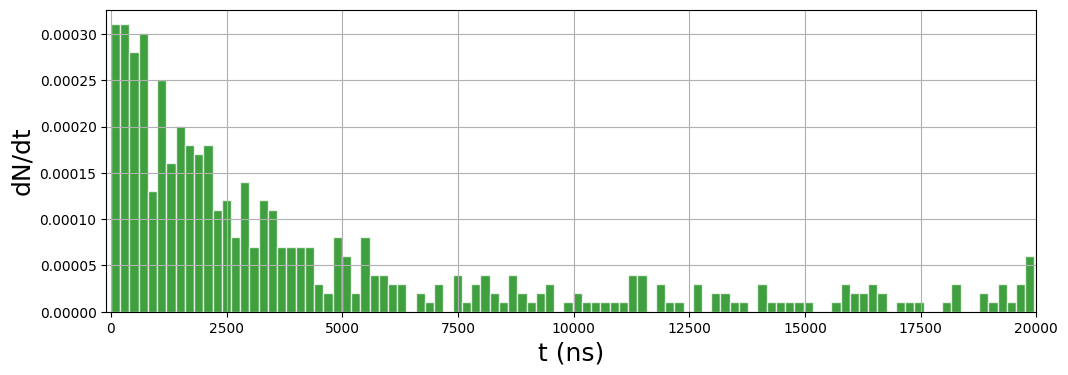

Total Number of Signal Events =  350 Total Number of Background Events =  150


In [35]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,4), dpi= 100)

n, bins, patches = plt.hist(T, 100, density=True, facecolor='g', alpha=0.75,edgecolor='white')

plt.xlim((-100,T_max)) 
plt.xlabel('t (ns)', fontsize=18)
plt.ylabel('dN/dt', fontsize=18)
plt.grid()
plt.show()
print ("Total Number of Signal Events = ", len(T_mu), "Total Number of Background Events = ", N_Backg)

### Let's plot the first event

In [36]:
import plotly.graph_objects as go
Y = Events[0]
X = [8*i for i in range(len(Y))]
fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=Y,mode='lines+markers',
    line=dict(color="green",  width=2),
    marker=dict(color="blue", size=4)))
fig.update_layout(
    title="Simulation of a Double-Pulse Event",
    xaxis_title="Time (ns)",
    yaxis_title="Amplitude (mV)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"))
fig.show(renderer="colab")

### Now we read back the saved events

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
# Using readlines()
file = open('/content/gdrive/My Drive/Muon-Decay-Sim.txt', 'r')
Lines = file.readlines()
count = 0
Events_read = []
for line in Lines:
    count += 1
    event = [float(i) for i in line.split(',')[0:-1]]
    Events_read.append(event)
print("Number of events read = ", count)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Number of events read =  500


Let's plot the first event

In [39]:
import plotly.graph_objects as go
Y = Events_read[0]
X = [8*i for i in range(len(Y))]
fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=Y,mode='lines+markers',
    line=dict(color="green",  width=2),
    marker=dict(color="blue", size=4)))
fig.update_layout(
    title="Simulation of a Double-Pulse Event",
    xaxis_title="Time (ns)",
    yaxis_title="Amplitude (mV)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"))
fig.show(renderer="colab")